In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append("..")

In [2]:
# Read CSV files
a1_df = pd.read_csv(os.path.join("..","in","A1_emissions.csv"))
a2_logreg_df = pd.read_csv(os.path.join("..","in","A2_logreg_emissions.csv"))
a2_mlp_df = pd.read_csv(os.path.join("..","in","A2_mlp_emissions.csv"))
a3_df = pd.read_csv(os.path.join("..","in","A3_emissions.csv"))
a4_df = pd.read_csv(os.path.join("..","in","A4_emissions.csv"))

In [3]:
# Calculating total emissions
total_emissions = {
    "Assignment 1": a1_df["emissions"].sum(),
    "Assignment 2 - logreg": a2_logreg_df["emissions"].sum(),
    "Assignment 2 - mlp": a2_mlp_df["emissions"].sum(),
    "Assignment 3": a3_df["emissions"].sum(),
    "Assignment 4": a4_df["emissions"].sum()
}

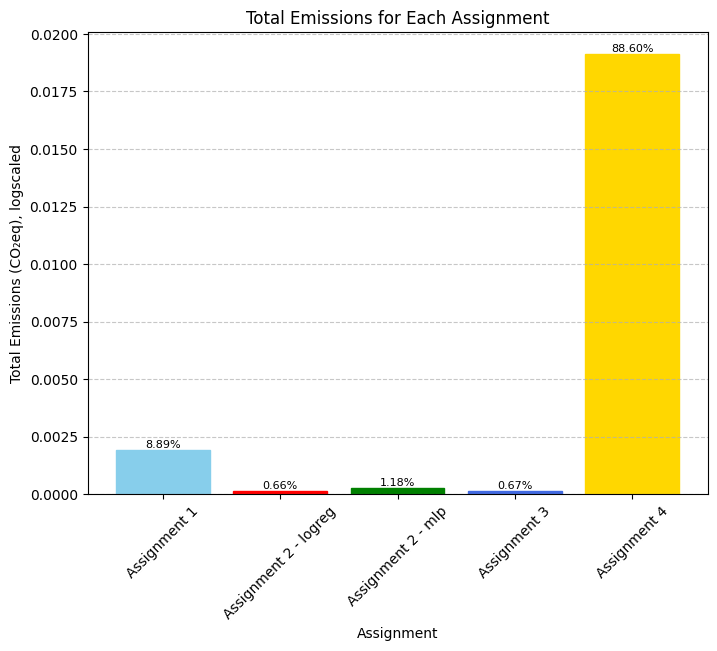

In [4]:
# Plot the total emissions for each assignment
# Define colors for each assignment
assignment_colors = {
    "Assignment 1": 'skyblue',
    "Assignment 2 - logreg": 'red',
    "Assignment 2 - mlp": 'green',
    "Assignment 3": 'royalblue',
    "Assignment 4": 'gold'
}

# Extract assignments and emissions
assignments = list(total_emissions.keys())
emissions = list(total_emissions.values())

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(assignments, emissions)
for i, bar in enumerate(bars):
    assignment = assignments[i]
    bar.set_color(assignment_colors.get(assignment, 'skyblue'))
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             '%.2f%%' % (emissions[i] / sum(emissions) * 100),
             ha='center', va='bottom', fontsize=8, rotation=0)
plt.title('Total Emissions for Each Assignment')
plt.xlabel('Assignment')
plt.ylabel('Total Emissions (CO₂eq), logscaled')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [5]:
# Group tasks by name and sum their emissions for each assignment
a2_logreg_task_emissions = a2_logreg_df.groupby("task_name")["emissions"].sum()
a2_mlp_task_emissions = a2_mlp_df.groupby("task_name")["emissions"].sum()
a3_task_emissions = a3_df.groupby("task_name")["emissions"].sum()
a4_task_emissions = a4_df.groupby("task_name")["emissions"].sum()

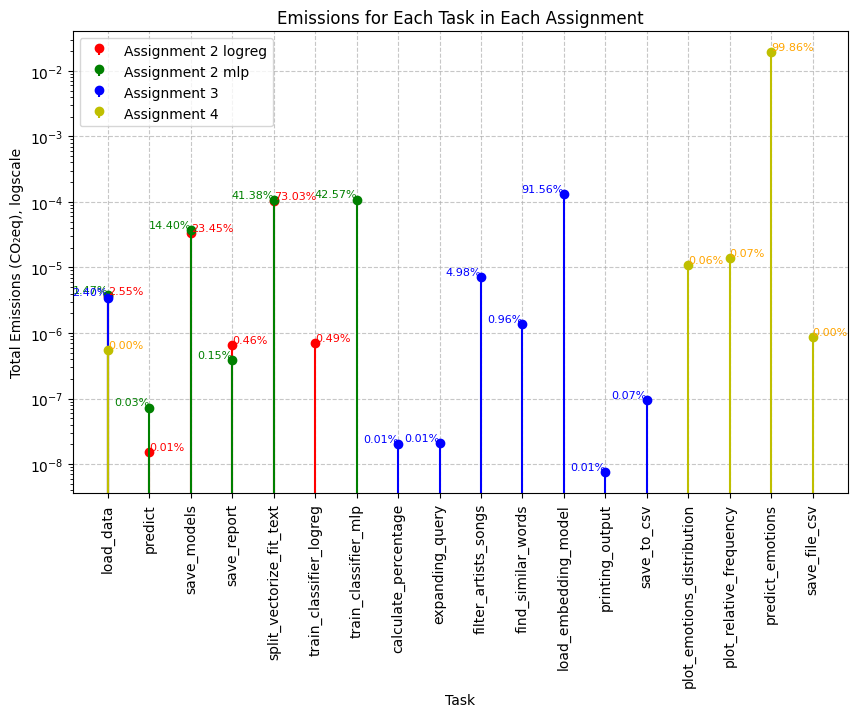

In [6]:
# Plot
plt.figure(figsize=(10, 6))

# Assignment 2 - logreg
for i, (task, emission) in enumerate(zip(a2_logreg_task_emissions.index, a2_logreg_task_emissions.values)):
    plt.stem([task], [emission], markerfmt='o', linefmt='r-', basefmt=' ', label='Assignment 2 logreg' if i == 0 else None)
    plt.text(task, emission, '%.2f%%' % (emission / sum(a2_logreg_task_emissions.values) * 100), ha='left', va='bottom', fontsize=8, color='red')

# Assignment 2 - mlp
for i, (task, emission) in enumerate(zip(a2_mlp_task_emissions.index, a2_mlp_task_emissions.values)):
    plt.stem([task], [emission], markerfmt='o', linefmt='g-', basefmt=' ', label='Assignment 2 mlp' if i == 0 else None)
    plt.text(task, emission, '%.2f%%' % (emission / sum(a2_mlp_task_emissions.values) * 100), ha='right', va='bottom', fontsize=8, color='green')

# Assignment 3
for i, (task, emission) in enumerate(zip(a3_task_emissions.index, a3_task_emissions.values)):
    plt.stem([task], [emission], markerfmt='o', linefmt='b-', basefmt=' ', label='Assignment 3' if i == 0 else None)
    plt.text(task, emission, '%.2f%%' % (emission / sum(a3_task_emissions.values) * 100), ha='right', va='bottom', fontsize=8, color='blue')

# Assignment 4
for i, (task, emission) in enumerate(zip(a4_task_emissions.index, a4_task_emissions.values)):
    plt.stem([task], [emission], markerfmt='o', linefmt='y-', basefmt=' ', label='Assignment 4' if i == 0 else None)
    plt.text(task, emission, '%.2f%%' % (emission / sum(a4_task_emissions.values) * 100), ha='left', va='bottom', fontsize=8, color='orange')

plt.title('Emissions for Each Task in Each Assignment')
plt.xlabel('Task')
plt.ylabel('Total Emissions (CO₂eq), logscale')
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()